Enter the title ID from IMDB: 2356777


<ipython-input-2-e07b89f8b596>:36: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


True Detective (TV Series 2014– ) - IMDb
9.0
490810
Total Number of Seasons:  3

Done
Season Number      int64
Episode Number    object
Episode Title     object
Air Date          object
Total Votes       object
Rating            object
dtype: object
   Season Number  Episode Number                Episode Title   Air Date  \
0              1               1         The Long Bright Dark 2014-01-13   
1              1               2                Seeing Things 2014-01-19   
2              1               3              The Locked Room 2014-01-26   
3              1               4               Who Goes There 2014-02-09   
4              1               5  The Secret Fate of All Life 2014-02-16   
5              1               6               Haunted Houses 2014-02-23   

   Total Votes  Rating  
0      18491.0     9.0  
1      15973.0     8.9  
2      15373.0     9.2  
3      23022.0     9.7  
4      16968.0     9.6  
5      14119.0     9.2  
Season Number              int32
Episode N

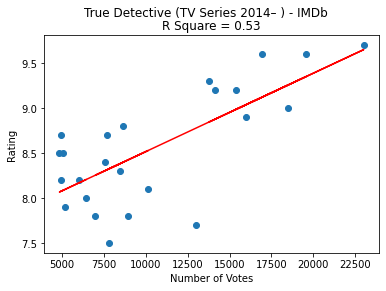

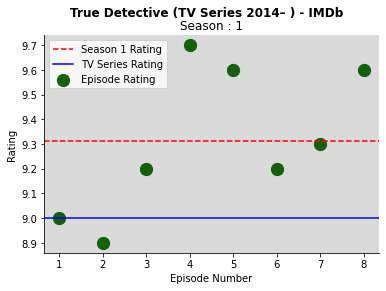

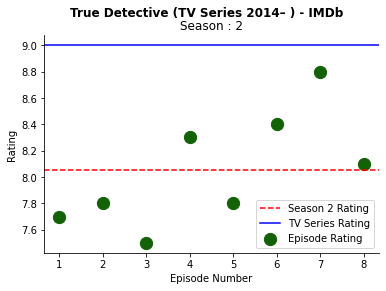

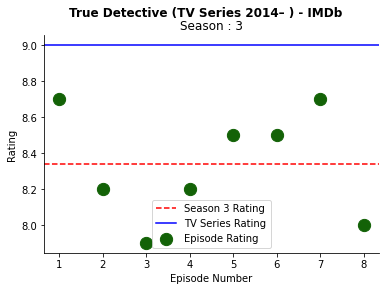

In [2]:
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
#for selecting options from drop down menus
from requests.compat import urljoin
#for creating a user based URL, 'urljoin' is used
from requests import get
# for getting html document of the page, we use get(url) which is available in 'requests' library

from bs4 import BeautifulSoup
# to read through html of the webpage and filter relevant information

from sklearn.linear_model import LinearRegression #to run linear regression
import matplotlib.pyplot as plt  # To visualize

# Import seaborn
import seaborn as sns

base_url = "https://www.imdb.com/title/"

#Ask use to enter the title ID from IMDB
tvid = "tt" + input("Enter the title ID from IMDB:")

#Combine base URL and TVID to get the final URL that has to be opened
url = urljoin(base_url,tvid)

# Set up the Selenium driver (in this case I am using the Chrome browser)
options = webdriver.ChromeOptions()
 
# 'headless' means that it will run without opening a browser
# If you don't set this option, Selenium will open up a new browser window (try it out if you like)
options.add_argument('headless')

# One need to use a webdriver application to open that web browser. Check the version of Chrone for downloading the webdriver for selenium
driver = webdriver.Chrome(chrome_options=options) 

driver.set_page_load_timeout(10)
driver.get(url) #driver.get is used to open the URL in the web browser

tv_series_html = get(url) #we will request from the server the content of the web page (html) by using get()
tv_series_html_soup = BeautifulSoup(tv_series_html.text, 'html.parser')

#To find Name of TV Series
tv_series_title = tv_series_html_soup.find('title').text #.strip(" - IMDb")
print(tv_series_title)


#To find Overall Rating of the TV Series
tv_series_rating = tv_series_html_soup.find('div',class_="ratingValue").span.text
tv_series_rating = float(tv_series_rating)
print(tv_series_rating)

#To find total votes for the Overall TV Series
tv_series_votes = tv_series_html_soup.find('div',class_="ratings_wrapper").a.text
tv_series_votes = int(tv_series_votes.replace(',',''))
print(tv_series_votes)


element = driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/div[5]/div[3]/div[1]/div/div/div[3]/a[2]")
element.click()

time.sleep(4)


# Selenium provides a convenient Select class to work with select -> option constructs ie selecting from drop down muenus
season_select = Select(driver.find_element_by_id("bySeason")) 
#season_select.select_by_value('1')

all_seasons = len(season_select.options) #to get total number of seasons
print("Total Number of Seasons: ",all_seasons)

tv_show_database = []

for seasons in range(all_seasons):
    #print("Season: ",seasons+1)
    season_select = Select(driver.find_element_by_id("bySeason")) #to be inside the loop as element have to be selected again and again
    time.sleep(5) #to accomodate for page load time
    season_select.select_by_index(seasons)
    time.sleep(4)
    
    season_url = driver.current_url #to get the URL of the current page, in this case of the season
    #print(season_url)

    season_html = get(season_url) #we will request from the server the content of the web page (html) by using get()
    
    #we’ll parse response.text by creating a BeautifulSoup object, and assign this object to html_soup. 
    #The html.parser argument indicates that we want to do the parsing using Python’s built-in HTML parser.

    season_html_soup = BeautifulSoup(season_html.text, 'html.parser')

    #all of the info we need is in <div class="info" ...> </div>:
    # grabing all of the instances of <div class="info" ...> </div> from the page; there is one for each episode
    # find_all() returned a ResultSet object 'season_containers', which is a list containing all of the 25 <div class="info" ...> </div>s

    season_containers = season_html_soup.find_all('div', class_='info')
    
    # Now we can extract the data from the episode_containters for each episode
    # <span class="ipl-rating-star__rating">7.5</span> --> we will be calling tag 'ipl-rating-star__rating' to get rating '7.5'
    
    for episodes in season_containers:
    
        episode_tite = episodes.a['title'] #For the title we will need to call title attribute from the <a> tag
        
        try:
            episode_number = episodes.meta['content'] #The episode number in the <meta> tag, under the content attribute
        except:
            episode_number = 0
        
        try:
            episode_airdate = episodes.find('div', class_='airdate').text.strip() #Airdate is in the <div> tag with the class airdate, and we can get its contents the text attribute, afterwhich we strip() it to remove whitespace
        except:
            episode_airdate = "1 Jan 2021"
        
        try:
            episode_rating = episodes.find('span', class_='ipl-rating-star__rating').text #The rating is is in the <span> tag with the class ipl-rating-star__rating, which also use the text attribute to get the contents of.
        except:
            episode_rating = 0
        
        try:
            episode_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
        except:
            episode_votes = int(0)
        
        
        #print("Season: ",seasons+1,episode_number,episode_tite,episode_airdate,episode_votes,episode_rating)
        
        #Compiling the episode info
        episode_data = [seasons+1,episode_number,episode_tite,episode_airdate,episode_votes,episode_rating]
        
        #adding Episode data to TV_Show_Database
        tv_show_database.append(episode_data)
    
print("\nDone")
driver.close()
driver.quit()
#---------------------------------------------------------------------------------------------------------------------------------------

# In the above we have accessed the list of episodes with their details (number, air date, title, votes, rating)
# Now we will add all these to a file named 'Name of TV Show_Episodes Database'

import pandas as pd
import numpy as np
#for database management

tv_show_database = pd.DataFrame(tv_show_database,columns = ['Season Number','Episode Number','Episode Title','Air Date','Total Votes','Rating'])

#print(tv_show_database.head(6)) #'.head()' by default shows top 5 rows. 

print(tv_show_database.dtypes) #to check datatypes of columns

#convert Season Number, Episode Number & Total Votes to int, Air Date to date format and Rating to float using 'astype'

tv_show_database['Rating']= tv_show_database['Rating'].astype(float)
tv_show_database[['Season Number','Episode Number']] = tv_show_database[['Season Number','Episode Number']].astype(int) 
#tv_show_database['Episode Number'] = tv_show_database['Episode Number'].astype(int)
tv_show_database['Air Date'] = pd.to_datetime(tv_show_database['Air Date'])

#Total Votes have parentheses() and ','. So first we have to strip the parantheses ''()'' and ',' , then convert to int

tv_show_database['Total Votes'] = tv_show_database['Total Votes'].str.replace(r"[(,)]","")
tv_show_database['Total Votes'] = tv_show_database['Total Votes'].astype(float)


# Now we will further clean the file and delete any row haveing '0' or NULL values. Basically we will delete rows that didn't have ratings

tv_show_database.replace(0, np.NaN, inplace = True)
#We have to drop rows having np.NaN using .dropna()
tv_show_database.dropna(subset = ["Rating"], axis = 0, inplace = True)

# once we have dropped those 4 rows, we need to reset the row index
tv_show_database.reset_index(drop=True, inplace=True)




print(tv_show_database.head(6))
print(tv_show_database.dtypes)

path = "C:\\Python Advanced\\Programs\\IMDB TV Show Database\\"

file_tv_series_title = tv_series_title + " Database.csv"
tv_show_database.to_csv(path + file_tv_series_title, index=False)

# We have created a database of the TV Show rating and voters and saved it to path
#--------------------------------------------------------------------------------------------------------------------------------
# Now we will run a simple regression to check if 'Total Votes' have any impact on 'Rating'

data = pd.read_csv(path + file_tv_series_title)
print(data.head(1))


X = data.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array. Column 5(arrays start from 0) is Total Votes (Independent)
Y = data.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column. Column 6 is Rating (Dependent)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

r2 = linear_regressor.score(X,Y)
print("R Square = ",r2)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.suptitle(tv_series_title)
plt.title("R Square = "+ "{:.2f}".format(r2))
plt.xlabel('Number of Votes') #to mention X-Label
plt.ylabel('Rating') #to mention Y-Label
plt.savefig(path + file_tv_series_title + " Regression.jpeg", bbox_inches='tight')
plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------
# Now we will plot the graphs using pandas, numpy, matplotlib and seaborn. Then we will save all the plots in a single pdf file 

tv_show = pd.read_csv(path + file_tv_series_title)
#tv_show.head()


j=1
avg_season_rating = [] #create a list of 'Season Average Rating'      
for i in tv_show['Season Number']:  
    if (i==j): #to ensure the loop runs only 1 time per season
        
        avg_season_rating.append(tv_show.loc[(tv_show['Season Number']==i)]['Rating'].mean())
        j=i+1

tv_show['Cummulative Moving Average Episode Rating'] = tv_show['Rating'].expanding(min_periods = 1).mean() #cummulative moving average has a pre-defined formula


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages(path + file_tv_series_title + ".pdf")
j=1

for i in tv_show['Season Number']:
    if (i==j): #to ensure the loop runs only 1 time per season
        fig, ax = plt.subplots() # this line is required to use 'ax.'. I don't understand why it works, but it works
        
        x=tv_show.loc[(tv_show['Season Number']==i)]['Episode Number']
        
        plt.scatter(x,y = tv_show.loc[(tv_show['Season Number']==i)]['Rating'], label = 'Episode Rating', color = '#136207', s = 150) #'s' is for marker size
        
        plt.axhline(y=avg_season_rating[i-1], color='r', linestyle='--', label = 'Season %d Rating'%i)
        
        plt.axhline(tv_series_rating, color ='b', label = "TV Series Rating")
        
        plt.legend(loc = 'best') #legend() automatically uses the 'labels' in graphs. 'loc='best'' adds legend to the best location 
        
        plt.suptitle(tv_series_title, fontsize=12, fontweight='bold')
        plt.title("Season : %d"%i) #Syntax to have dynamic variable in title (link:https://stackoverflow.com/questions/43757820/how-to-add-a-variable-to-python-plt-title/43758816)
        
        
        
        plt.xlabel('Episode Number') #to mention X-Label
        plt.ylabel('Rating') #to mention Y-Label
        #plt.xticks(np.arange(min(x), max(x)+1, 4.0)) #To create a interval of '2.0' in x-axis. Use this format!
        #start, end = ax.get_xlim()
        #ax.xaxis.set_ticks(np.arange(start, end, 5))
        ax.spines['top'].set_visible(False) #to remove top and left axis, but keep the tickers
        ax.spines['right'].set_visible(False)
        ax.grid(False) # to remove the gridlines
        
        if (avg_season_rating[i-1] > tv_series_rating):
            ax.set_facecolor('#DADADA') #to change the background color of the graph
        
        
        #print(i,j)
        plt.savefig(path + file_tv_series_title + " Season %d.jpeg"%i, bbox_inches='tight')
        pdf.savefig()
        plt.show()
        
        j=i+1
pdf.close()